# Part 1: Exploratory Data Analysis

Load and explore the dataset to understand its structure

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('MoMTSim_20240722202413_1000_dataset.csv')
display(df.count())
display(df.tail())
display(df.describe())

display(df.info())

step               4225958
transactionType    4225958
amount             4225958
initiator          4225958
oldBalInitiator    4225958
newBalInitiator    4225958
recipient          4225958
oldBalRecipient    4225958
newBalRecipient    4225958
isFraud            4225958
dtype: int64

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
4225953,192,TRANSFER,30.21,4553340044344003,30.21,0.00,4857848274256757,6724271.67,6724301.88,1
4225954,192,PAYMENT,564.88,4661148030050354,0.00,0.00,99-0001567,518107.98,518107.98,0
4225955,192,PAYMENT,697.48,4324436406765252,19012756.07,19012058.59,76-0004439,315608.97,316306.44,0
4225956,192,TRANSFER,19611.79,4324436406765252,19012058.59,18992446.80,4195960558852622,16896.95,36508.74,1
4225957,192,PAYMENT,597.90,4981498694591828,561.09,561.09,61-0004985,422939.22,422939.22,0


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06
mean,9.811771e+01,5.302139e+04,4.495008e+15,2.246055e+07,2.246527e+07,1.685005e+06,1.703967e+06,5.284288e-01
std,5.573710e+01,2.708194e+06,2.912521e+14,6.418504e+07,6.421561e+07,6.795783e+06,6.802160e+06,4.991912e-01
min,0.000000e+00,0.000000e+00,4.000000e+15,-1.999926e+05,-1.999926e+05,-7.477966e+04,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.444000e+01,4.237994e+15,4.681000e+01,0.000000e+00,3.345156e+04,4.251237e+04,0.000000e+00
50%,9.900000e+01,5.966900e+02,4.491576e+15,3.655435e+03,0.000000e+00,2.007614e+05,2.042479e+05,1.000000e+00
75%,1.470000e+02,1.708469e+04,4.747260e+15,2.344082e+05,8.150306e+04,2.002134e+06,2.041814e+06,1.000000e+00
max,1.920000e+02,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,3.810134e+08,3.813883e+08,1.000000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225958 entries, 0 to 4225957
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 322.4+ MB


None

Identify and handle missing values

In [34]:
print(df.isnull().sum())

step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


Analyze the distribution of features and target classes

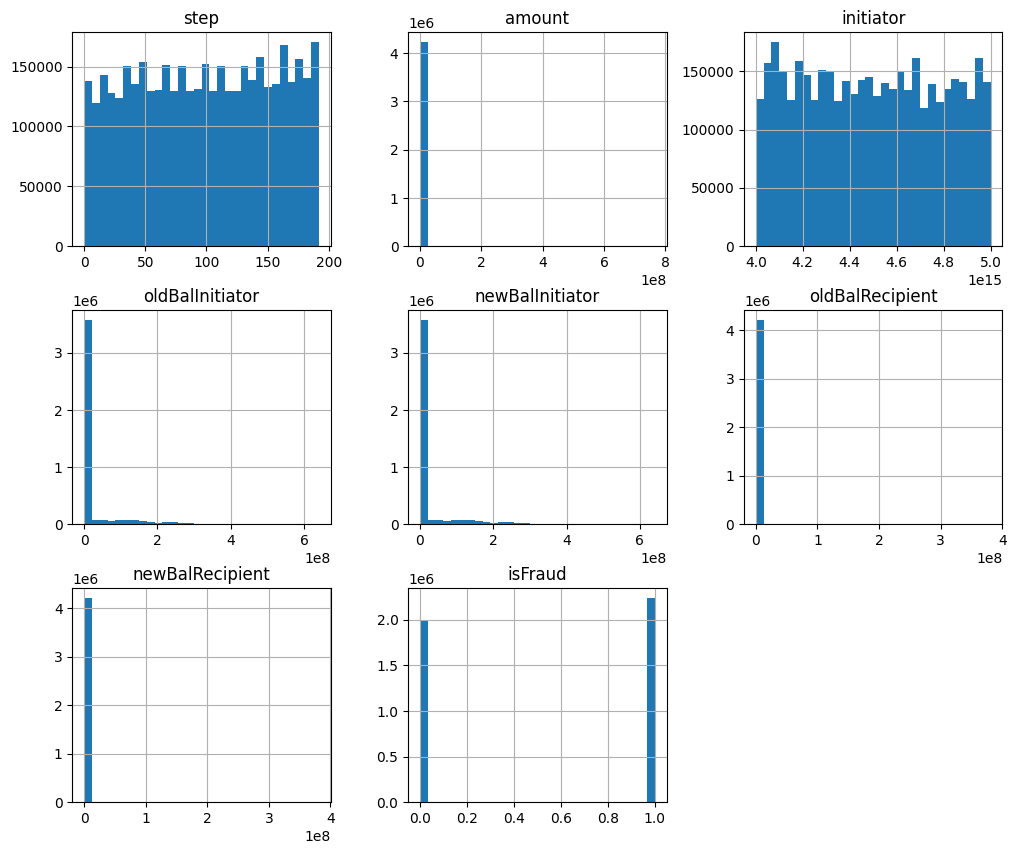

In [35]:
df.hist(figsize=(12, 10), bins=30)
plt.show()


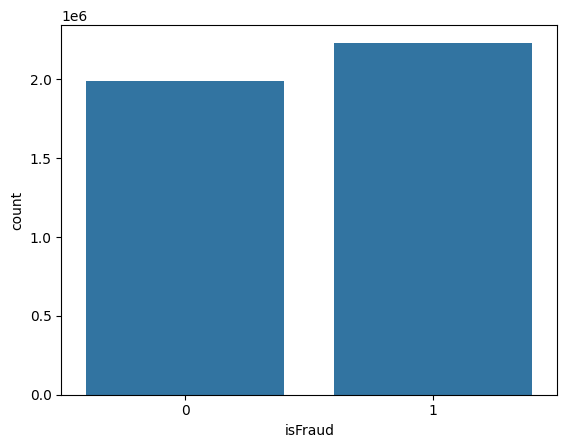

In [36]:
sns.countplot(x=df["isFraud"])
plt.show()

Identify potential outliers and determine how to handle them:

Identtify by using box plot and IQR also we will remove this outlier

Use boxplot visualizations for each numerical feature to detect outliers

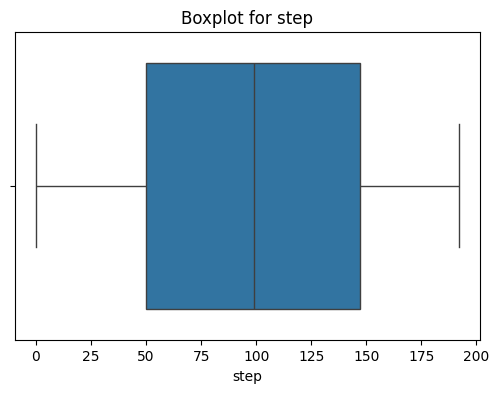

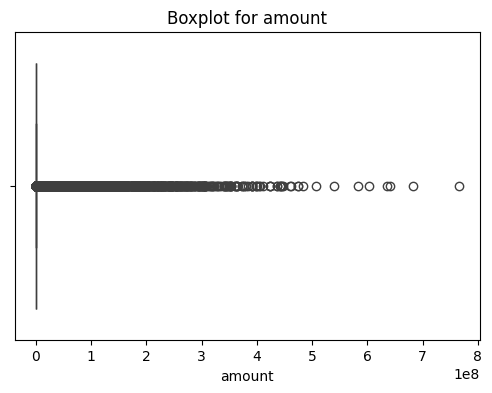

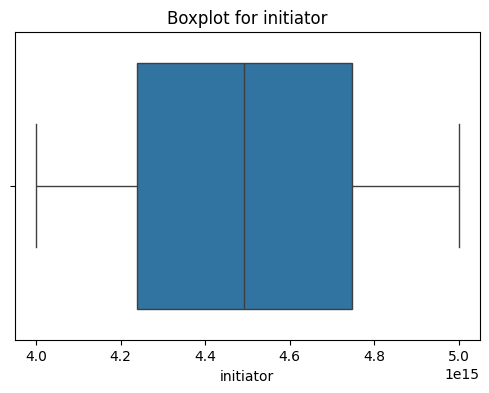

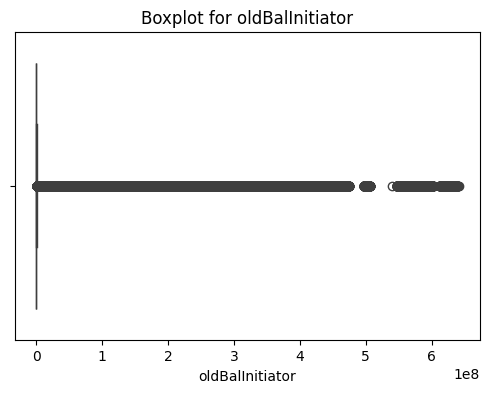

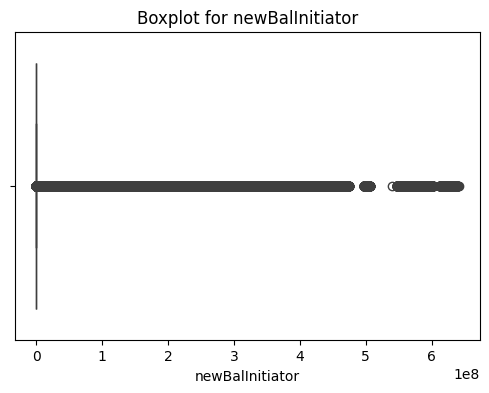

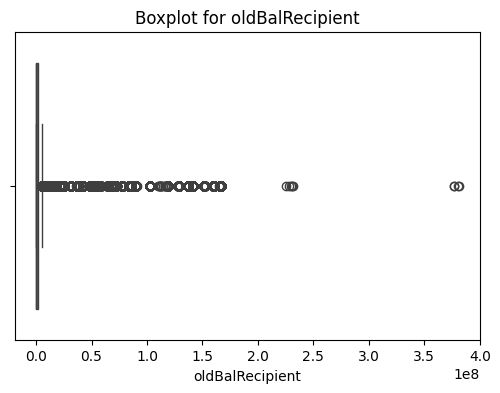

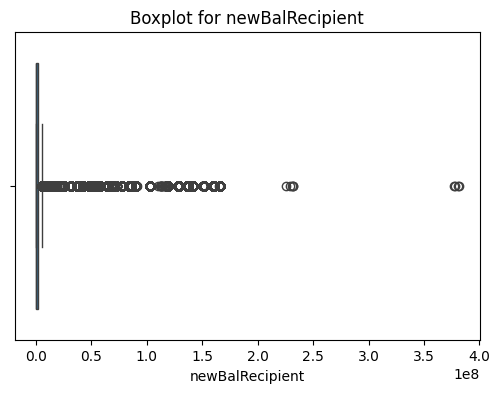

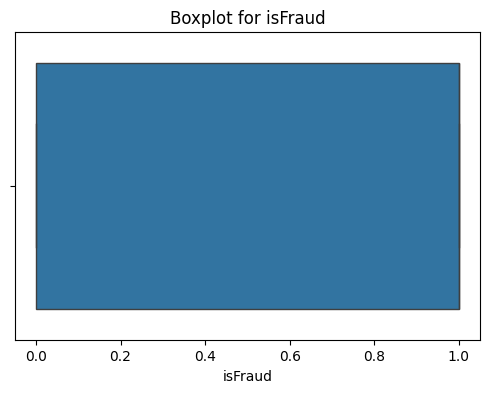

In [37]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


Apply the IQR (Interquartile Range) method with boxplots to quantitatively identify
outliers

In [38]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each numeric column:\n", outliers)


Number of outliers in each numeric column:
 step                     0
amount              370472
initiator                0
oldBalInitiator     898754
newBalInitiator    1004925
oldBalRecipient     357957
newBalRecipient     348787
isFraud                  0
dtype: int64


Visualize outliers using boxplots across different target classes

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\1645721365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")


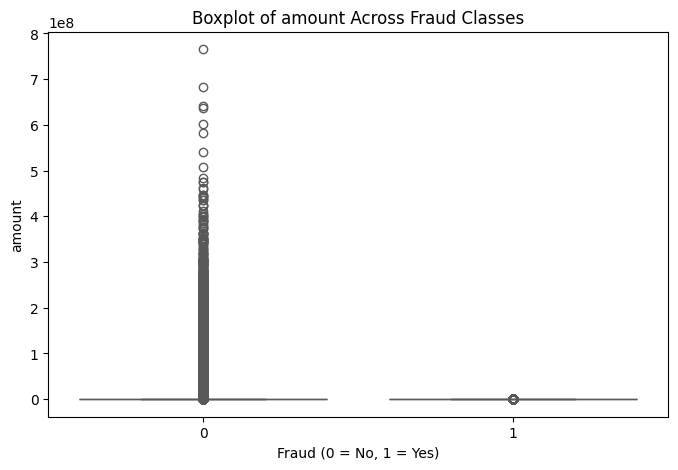

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\1645721365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")


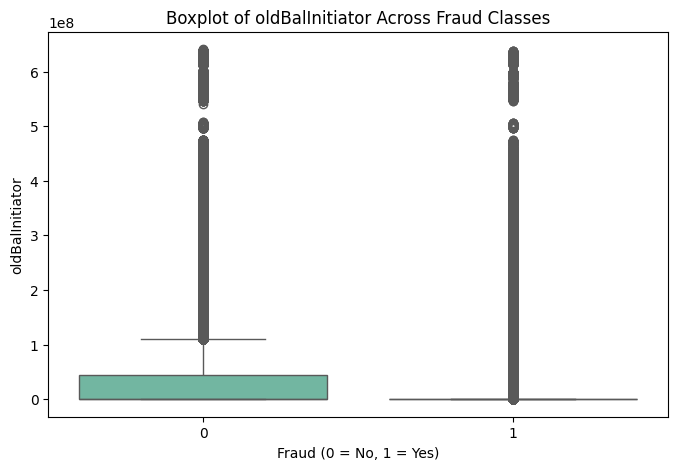

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\1645721365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")


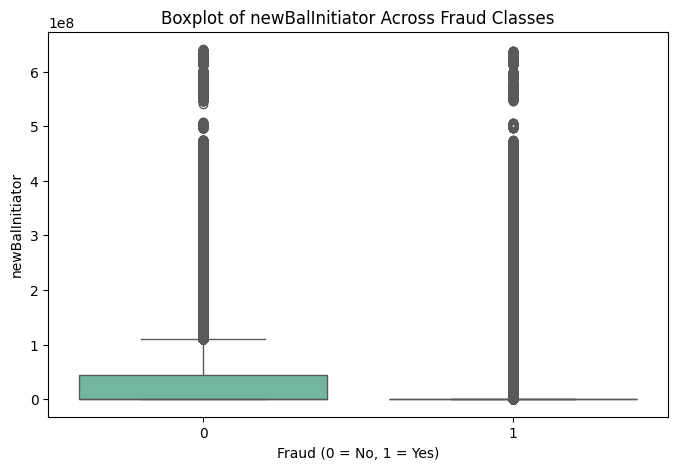

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\1645721365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")


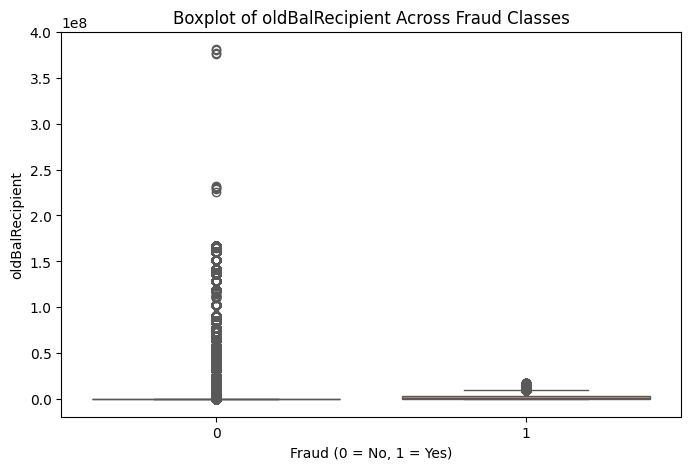

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\1645721365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")


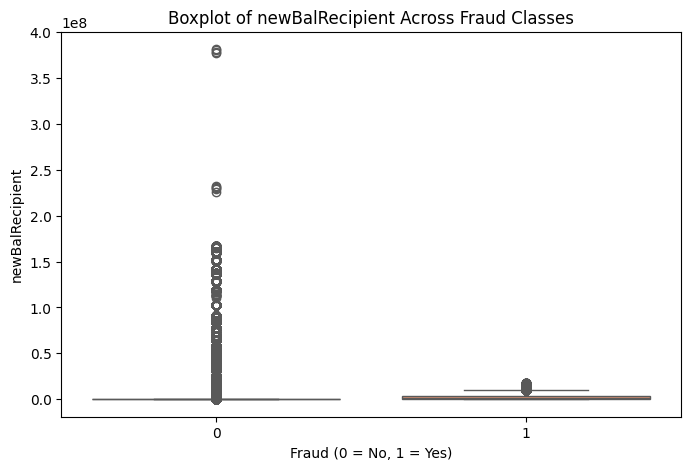

In [39]:
num_columns = ["amount", "oldBalInitiator", "newBalInitiator", "oldBalRecipient", "newBalRecipient"]
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["isFraud"], y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col} Across Fraud Classes")
    plt.xlabel("Fraud (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

Compare results with at least one other outlier detection method

In [40]:
from scipy.stats import zscore
num_cols = ["amount", "oldBalInitiator", "newBalInitiator", "oldBalRecipient", "newBalRecipient"]
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]
def detect_outliers_zscore(data, col, threshold=3):
    z_scores = np.abs(zscore(data[col]))
    return data[z_scores > threshold]
outlier_counts = {"Feature": [], "IQR Outliers": [], "Z-score Outliers": []}
for col in num_cols:
    outlier_counts["Feature"].append(col)
    outlier_counts["IQR Outliers"].append(len(detect_outliers_iqr(df, col)))
    outlier_counts["Z-score Outliers"].append(len(detect_outliers_zscore(df, col)))
comparison_df = pd.DataFrame(outlier_counts)
print(comparison_df)


           Feature  IQR Outliers  Z-score Outliers
0           amount        370472               876
1  oldBalInitiator        898754            134167
2  newBalInitiator       1004925            134150
3  oldBalRecipient        357957             22758
4  newBalRecipient        348787             22786


Propose and implement a strategy for handling the detected outliers

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.describe())


               step        amount     initiator  oldBalInitiator  \
count  4.225958e+06  4.225958e+06  4.225958e+06     4.225958e+06   
mean   9.811771e+01 -5.437572e-18  4.495008e+15    -4.884063e-16   
std    5.573710e+01  1.000000e+00  2.912521e+14     1.000000e+00   
min    0.000000e+00 -1.957814e-02  4.000000e+15    -3.530503e-01   
25%    5.000000e+01 -1.954327e-02  4.237994e+15    -3.499337e-01   
50%    9.900000e+01 -1.935781e-02  4.491576e+15    -3.498775e-01   
75%    1.470000e+02 -1.326962e-02  4.747260e+15    -3.462824e-01   
max    1.920000e+02  2.826340e+02  5.000000e+15     9.635619e+00   

       newBalInitiator  oldBalRecipient  newBalRecipient       isFraud  
count     4.225958e+06     4.225958e+06     4.225958e+06  4.225958e+06  
mean      2.034331e-16     2.010119e-16     1.122353e-16  5.284288e-01  
std       1.000000e+00     1.000000e+00     1.000000e+00  4.991912e-01  
min      -3.529557e-01    -2.589525e-01    -2.505038e-01  0.000000e+00  
25%      -3.498413e-01

Visualize relationships between features and target classes (minimum 3 different visualization
types)

C:\Users\SMART TECH\AppData\Local\Temp\ipykernel_14672\140345544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["isFraud"], y=df["amount"], palette="Set2")


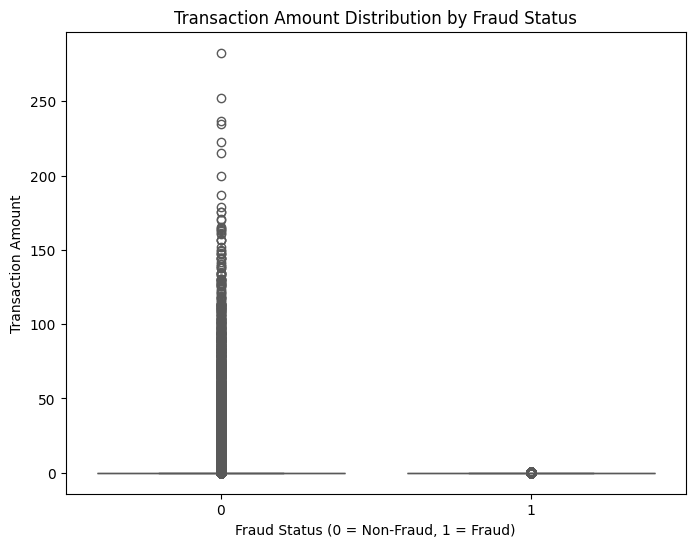

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["isFraud"], y=df["amount"], palette="Set2")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

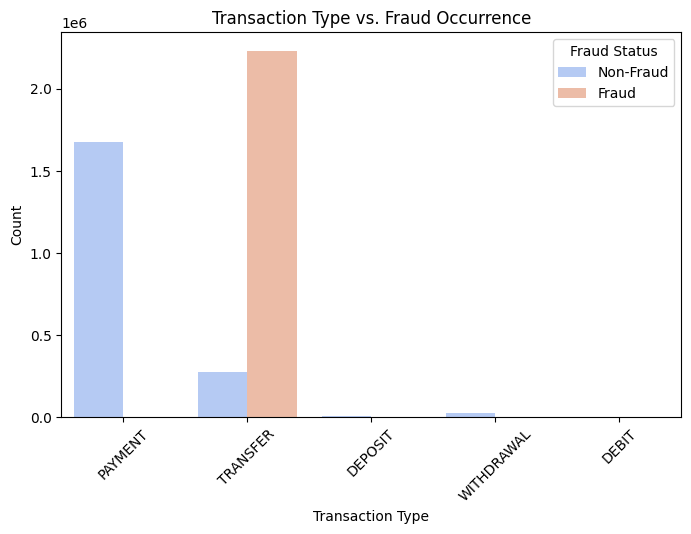

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["transactionType"], hue=df["isFraud"], palette="coolwarm")
plt.title("Transaction Type vs. Fraud Occurrence")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

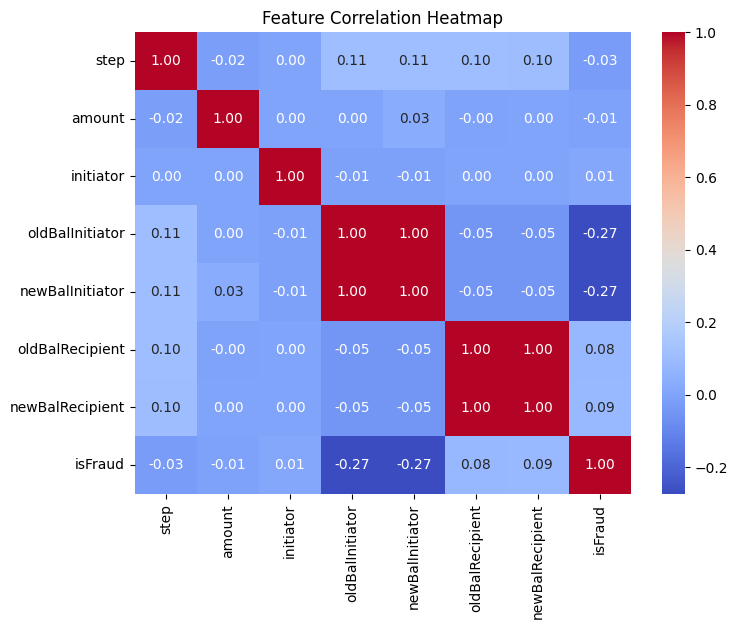

In [44]:
plt.figure(figsize=(8, 6))
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Calculate and interpret correlation matrices for numerical features

In [45]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                     step    amount  initiator  oldBalInitiator  \
step             1.000000 -0.017772   0.000788         0.108630   
amount          -0.017772  1.000000   0.000258         0.001075   
initiator        0.000788  0.000258   1.000000        -0.013033   
oldBalInitiator  0.108630  0.001075  -0.013033         1.000000   
newBalInitiator  0.107995  0.033095  -0.013040         0.999272   
oldBalRecipient  0.104394 -0.001336   0.002486        -0.047689   
newBalRecipient  0.104241  0.001777   0.002523        -0.047417   
isFraud         -0.028868 -0.007688   0.011919        -0.273513   

                 newBalInitiator  oldBalRecipient  newBalRecipient   isFraud  
step                    0.107995         0.104394         0.104241 -0.028868  
amount                  0.033095        -0.001336         0.001777 -0.007688  
initiator              -0.013040         0.002486         0.002523  0.011919  
oldBalInitiator         0.999272        -0.047689        -0.047417 -0.273513  
n

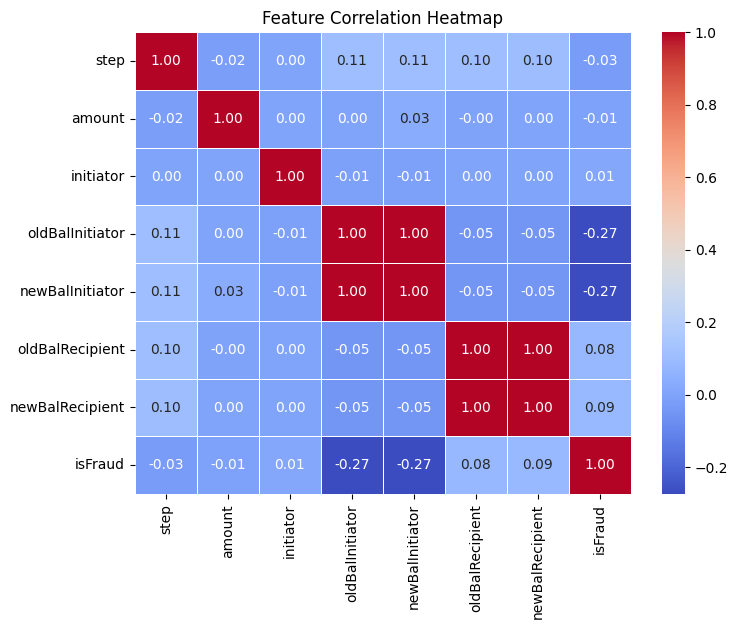

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Provide statistical summaries of the data

In [47]:
print(df.describe())


               step        amount     initiator  oldBalInitiator  \
count  4.225958e+06  4.225958e+06  4.225958e+06     4.225958e+06   
mean   9.811771e+01 -5.437572e-18  4.495008e+15    -4.884063e-16   
std    5.573710e+01  1.000000e+00  2.912521e+14     1.000000e+00   
min    0.000000e+00 -1.957814e-02  4.000000e+15    -3.530503e-01   
25%    5.000000e+01 -1.954327e-02  4.237994e+15    -3.499337e-01   
50%    9.900000e+01 -1.935781e-02  4.491576e+15    -3.498775e-01   
75%    1.470000e+02 -1.326962e-02  4.747260e+15    -3.462824e-01   
max    1.920000e+02  2.826340e+02  5.000000e+15     9.635619e+00   

       newBalInitiator  oldBalRecipient  newBalRecipient       isFraud  
count     4.225958e+06     4.225958e+06     4.225958e+06  4.225958e+06  
mean      2.034331e-16     2.010119e-16     1.122353e-16  5.284288e-01  
std       1.000000e+00     1.000000e+00     1.000000e+00  4.991912e-01  
min      -3.529557e-01    -2.589525e-01    -2.505038e-01  0.000000e+00  
25%      -3.498413e-01

In [48]:
print(df['transactionType'].value_counts())
print(df['isFraud'].value_counts())


transactionType
TRANSFER      2510947
PAYMENT       1677798
WITHDRAWAL      27064
DEPOSIT          8824
DEBIT            1325
Name: count, dtype: int64
isFraud
1    2233118
0    1992840
Name: count, dtype: int64


# Part 2: Data Preprocessing and Dataset Splitting

Implement data cleaning techniques based on your EDA findings

In [49]:
df.drop_duplicates(inplace=True)
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            continue 
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip() 
irrelevant_columns = ["ID", "Unnamed: 0"]  
df.drop(columns=[col for col in irrelevant_columns if col in df.columns], inplace=True)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_cols, inplace=True)

print("Data Cleaning Complete! Cleaned dataset shape:", df.shape)

Data Cleaning Complete! Cleaned dataset shape: (4225938, 10)


Apply appropriate encoding methods for categorical variables

i`m use one-hot encoding

In [50]:
df = pd.get_dummies(df, columns=['transactionType'], drop_first=True)
print("Encoding complete! New dataset shape:", df.shape)
print(df.head())

Encoding complete! New dataset shape: (4225938, 13)
   step    amount         initiator  oldBalInitiator  newBalInitiator  \
0     0 -0.019364  4018807983755588        -0.349934        -0.349841   
1     0 -0.019564  4610593854752035        -0.349934        -0.349841   
2     0 -0.019570  4840578447365454        -0.349934        -0.349841   
3     0 -0.019368  4958066799829630        -0.349934        -0.349841   
4     0 -0.019366  4149196095918843        -0.349933        -0.349840   

          recipient  oldBalRecipient  newBalRecipient  isFraud  \
0        30-0000345        -0.247949        -0.250504        0   
1  4944921135715488        -0.247940        -0.250490        1   
2  4305579785620656        -0.247940        -0.250492        1   
3        00-0000388        -0.247949        -0.250504        0   
4        80-0005320        -0.247949        -0.250504        0   

   transactionType_deposit  transactionType_payment  transactionType_transfer  \
0                    False     

# Implement feature normalization techniques:

Compare Min-Max scaling and Z-score normalization on at least 3 models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [58]:
X = df.drop(columns=['isFraud', 'recipient'])  
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=500000, random_state=42)
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_sample)
X_test_minmax = min_max_scaler.transform(X_test)
X_train_zscore = z_score_scaler.fit_transform(X_train_sample)
X_test_zscore = z_score_scaler.transform(X_test)
models = {
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": SVC(max_iter=1000)
}
results = {}
for model_name, model in models.items():
    model.fit(X_train_minmax, y_train_sample)
    y_pred_minmax = model.predict(X_test_minmax)
    acc_minmax = accuracy_score(y_test, y_pred_minmax)

    model.fit(X_train_zscore, y_train_sample)
    y_pred_zscore = model.predict(X_test_zscore)
    acc_zscore = accuracy_score(y_test, y_pred_zscore)

    results[model_name] = {"Min-Max Accuracy": acc_minmax, "Z-score Accuracy": acc_zscore}

# Print results
for model, scores in results.items():
    print(f"{model}: Min-Max Acc = {scores['Min-Max Accuracy']:.4f}, Z-score Acc = {scores['Z-score Accuracy']:.4f}")


c:\Users\SMART TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\SMART TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


KNN (K=5): Min-Max Acc = 0.9585, Z-score Acc = 0.9603
Logistic Regression: Min-Max Acc = 0.9495, Z-score Acc = 0.9522
Linear SVM: Min-Max Acc = 0.9574, Z-score Acc = 0.9633


Z-score normalization slightly outperformed Min-Max scaling in all models because it standardizes features to have zero mean and unit variance, making distance-based models like KNN and SVM more stable. Min-Max scaling, while useful for compressing data into a fixed range, is more sensitive to outliers, which can distort distances. Logistic Regression also benefited from Z-score normalization as it assumes normally distributed features, improving optimization. Overall, Z-score normalization provided better accuracy and robustness across models.

# Implement feature selection methods:
 Use correlation-based methods
Select optimal feature subsets based on your findings

In [75]:
correlation_threshold = 0.1
correlation_target = correlation_matrix["isFraud"].abs()
selected_features = correlation_target[correlation_target > correlation_threshold].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['oldBalInitiator', 'newBalInitiator', 'isFraud']


In [74]:
# Define correlation threshold for redundancy (e.g., 0.8)
corr_threshold = 0.05

# Identify redundant features
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Remove redundant features
optimal_features = list(set(selected_features) - high_corr_features)

print("Final Selected Features after Removing Redundant Ones:", optimal_features)


Final Selected Features after Removing Redundant Ones: []


In [76]:
high_corr_pairs = [("oldBalInitiator", "newBalInitiator"),
]

for f1, f2 in high_corr_pairs:
    if f1 in selected_features and f2 in selected_features:
        selected_features.remove(f2)  
optimal_features = df[selected_features]

print("Selected Features:", optimal_features)


Selected Features:          oldBalInitiator  isFraud
0              -0.349934        0
1              -0.349934        1
2              -0.349934        1
3              -0.349934        0
4              -0.349933        0
...                  ...      ...
4225953        -0.349934        1
4225954        -0.349934        0
4225955        -0.053717        0
4225956        -0.053727        1
4225957        -0.349926        0

[4225938 rows x 2 columns]


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
if optimal_features is None or not isinstance(optimal_features, list) or len(optimal_features) == 0:
    print("Warning: optimal_features is empty or invalid. Using default numeric columns.")
    optimal_features = df.select_dtypes(include=[np.number]).columns.tolist()
    optimal_features = [col for col in optimal_features if col != "isFraud"] 
optimal_features = [col for col in optimal_features if col in df.columns]
X = df[optimal_features].copy()
y = df["isFraud"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Accuracy after Feature Selection: {accuracy:.4f}")

# Dataset Splitting:
o Implement random splitting of the dataset

In [62]:
X = df[optimal_features]
y = df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

ValueError: Boolean array expected for the condition, not float64

o Choose the splitting approach that yields the best accuracy for your models

In [30]:
splits = [0.2, 0.25, 0.3,0.4]
best_acc = 0
best_split = None

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Size {split} -> Accuracy: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_split = split

print(f"Best Test Size: {best_split} with Accuracy: {best_acc:.4f}")


Test Size 0.2 -> Accuracy: 0.9647
Test Size 0.25 -> Accuracy: 0.9624
Test Size 0.3 -> Accuracy: 0.9600
Best Test Size: 0.2 with Accuracy: 0.9647


i'm choose th holdout appoach (20% testing,80% training)

# Part 3: Model Implementation

K-Nearest Neighbors (KNN):

In [40]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
# Drop or encode non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


Implement KNN with different distance metrics (Euclidean, Manhattan, Minkowski)

Analyze the effect of varying k values

In [43]:
distance_metrics = {
    "Euclidean": 'euclidean',
    "Manhattan": 'manhattan',
    "Minkowski": 'minkowski'
}
k_values = [3, 5, 7, 10] 
results = {}
for metric_name, metric in distance_metrics.items():
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1) 
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[(metric_name, k)] = accuracy
        print(f"{metric_name} (k={k}): Accuracy = {accuracy:.4f}")


Euclidean (k=3): Accuracy = 0.9424
Euclidean (k=5): Accuracy = 0.9426
Euclidean (k=7): Accuracy = 0.9421
Euclidean (k=10): Accuracy = 0.9398
Manhattan (k=3): Accuracy = 0.9445
Manhattan (k=5): Accuracy = 0.9450
Manhattan (k=7): Accuracy = 0.9449
Manhattan (k=10): Accuracy = 0.9433
Minkowski (k=3): Accuracy = 0.9424
Minkowski (k=5): Accuracy = 0.9426
Minkowski (k=7): Accuracy = 0.9421
Minkowski (k=10): Accuracy = 0.9398


Optimize the algorithm for the large dataset size

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
optimized_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
optimized_knn.fit(X_train_pca, y_train)
y_pred_pca = optimized_knn.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Optimized KNN with PCA: Accuracy = {accuracy_pca:.4f}")


Optimized KNN with PCA: Accuracy = 0.9425


Support Vector Machine (SVM):

Implement SVM with at least three different kernels

In [31]:
from sklearn.svm import SVC

Implement SVM with at least three different kernels

In [ ]:
kernels = ["linear", "rbf", "poly"]
svm_results = {}
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    svm_model = SVC(kernel=kernel, C=1.0, random_state=42)
    svm_model.fit(X_train_pca, y_train)
    y_pred = svm_model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    svm_results[kernel] = acc
for kernel, acc in svm_results.items():
    print(f"SVM with {kernel} Kernel: Accuracy = {acc:.4f}")


Training SVM with linear kernel...


Apply regularization techniques (C parameter tuning)

In [28]:
C_values = [0.1, 1, 10]
best_C = None
best_acc = 0
for C in C_values:
    print(f"Training SVM with RBF Kernel, C={C}...")
    svm_rbf = SVC(kernel="rbf", C=C, random_state=42)
    svm_rbf.fit(X_train_pca, y_train)
    y_pred = svm_rbf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for C={C}: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_C = C

print(f"Best C value for RBF Kernel: {best_C} with Accuracy = {best_acc:.4f}")


Training SVM with RBF Kernel, C=0.1...


NameError: name 'X_train_pca' is not defined

Address the computational challenges with the large dataset

In [ ]:
from sklearn.svm import LinearSVC
svm_linear_fast = LinearSVC(C=1.0, dual=False, random_state=42)
svm_linear_fast.fit(X_train_pca, y_train)
y_pred_fast = svm_linear_fast.predict(X_test_pca)
print(f"Fast Linear SVM Accuracy: {accuracy_score(y_test, y_pred_fast):.4f}")
